In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'30',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1bc585ce-2ea2-42ef-83cd-8fc7a446b609',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

# display all rows, all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# creating the dataframe and aggregating timestamp column
df = pd.json_normalize(data["data"])
df['timestamp'] = pd.to_datetime('now', utc=True)
#df

In [4]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'30',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1bc585ce-2ea2-42ef-83cd-8fc7a446b609',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data["data"])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df 
    
    if not os.path.isfile(r'D:\DataCamp_PYTHON\Projects\Datasets\CoinCapMarket\API.csv'):
        df.to_csv(r'D:\DataCamp_PYTHON\Projects\Datasets\CoinCapMarket\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\DataCamp_PYTHON\Projects\Datasets\CoinCapMarket\API.csv', mode='a', header=False)
        
        

In [ ]:
import os
from time import time
from time import sleep

for i in range(100):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed


In [5]:
df1 = pd.read_csv(r'D:\DataCamp_PYTHON\Projects\Datasets\CoinCapMarket\API.csv')

In [6]:
# changing large numbers format

pd.set_option('display.float_format', lambda x: '%.5f' % x)

#df1

In [7]:
# creating price changes dataframe

df2 = df1.groupby('name')[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d']].mean()
#df2

In [8]:
df3 = df2.stack()

df4 = df3.to_frame(name='values')

#df4

In [9]:
df4.count()

index = pd.Index(range(150))

df5 = df4.reset_index()
#df5

In [10]:
df5 = df5.rename(columns={'level_1':'percent_change'})
#df5

In [11]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d'],['1h','24h','7d','30d','60d'])
#df5

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

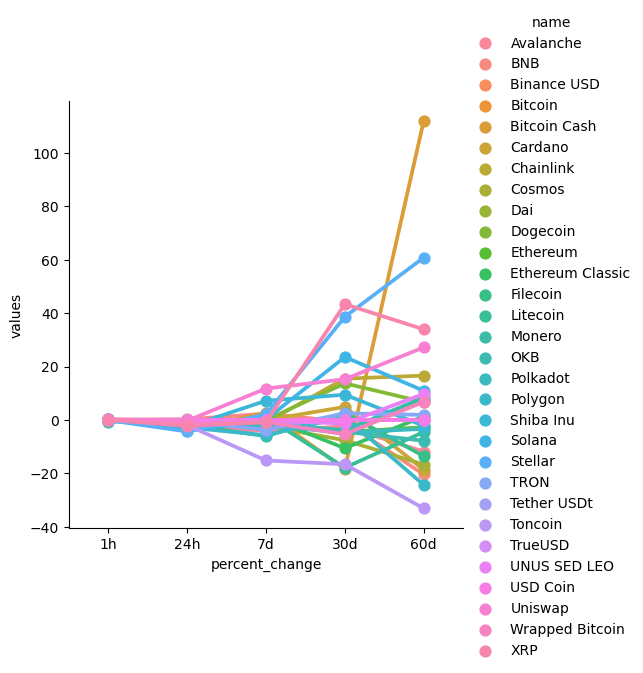

In [13]:
# visualizing price changes along different periods

sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')

In [14]:
# creating coin's price df

df6 = df1[['name', 'quote.USD.price', 'timestamp']]
#df6

In [15]:
df6 = df6.query("name == 'Bitcoin'")
#df6

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

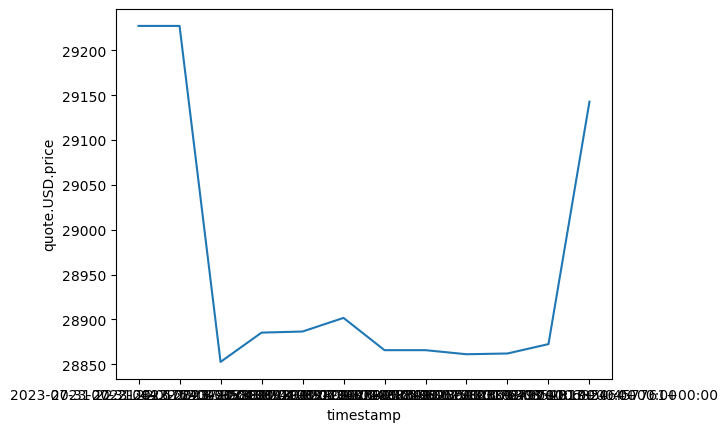

In [16]:
# visualizing Bitcoin price movements

sns.lineplot(x='timestamp', y='quote.USD.price', data=df6)

In [17]:
# visualizing coin's min and max volume

df7 = df1.groupby('name')['quote.USD.volume_24h'].agg([min,max])
#df7

<Axes: xlabel='name'>

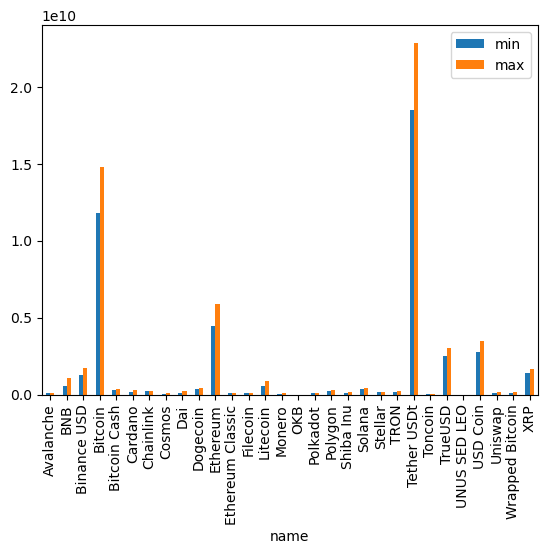

In [18]:
df7.plot(kind='bar')